In [1]:
# set automitic module reload. Useful when you are editing external python files
%load_ext autoreload   
%autoreload 2

%pylab inline

from lib.KDTreeEncoding import *

import xgboost as xgb
from lib.XGBHelper import *
from lib.XGBoost_params import *

from lib.logger import logger

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from numpy import load
from glob import glob
import pandas as pd
import pickle as pkl

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/yoavfreund/miniforge3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


###  load image filenames

In [2]:
poverty_dir='/Users/yoavfreund/datasets/poverty_v1.1/partitioned_images3'
urban=False
area='urban' if urban else 'rural'
depth=8

In [3]:
## load file list
image_dir=poverty_dir+f'/train/{area}'
print(poverty_dir)
files=[]
files+=glob(f'/{image_dir}/*/*.npz')
len(files)

/Users/yoavfreund/datasets/poverty_v1.1/partitioned_images3


5957

In [4]:
#load table entries
train_table=poverty_dir+'/tables/train_table.csv'
T=pd.read_csv(train_table,index_col=0)
df=T[T['urban']==urban]
df.index=df['filename']
df.shape

(5957, 6)

In [5]:
df.head()

,filename,country,wealthpooled,urban,label,nl_mean
filename,,,,,,
image18527.npz,image18527.npz,2,-1.019361,False,0,-0.086633
image16238.npz,image16238.npz,2,-1.090052,False,0,-0.097684
image4977.npz,image4977.npz,2,-1.143002,False,0,-0.141589
image17871.npz,image17871.npz,2,-0.955533,False,0,-0.173862
image12195.npz,image12195.npz,2,0.158699,False,1,0.913758


## train color encoder

Creates a KDtree in color space

In [6]:
%%time
## Generate encoding tree
train_size,tree=train_encoder(files,max_images=500,tree_depth=8)

used 500 images to train KDTree
KDTree training data shape= (25088000, 8)
CPU times: user 8.41 s, sys: 1.03 s, total: 9.44 s
Wall time: 10 s


In [7]:
%%time
## Encode all data using encoding tree
Enc_data=encoded_dataset(image_dir,df,tree,label_col='label')

CPU times: user 1min 22s, sys: 23.5 s, total: 1min 46s
Wall time: 1min 51s


In [8]:
%%time
data=Enc_data.data

CPU times: user 1e+03 ns, sys: 0 ns, total: 1e+03 ns
Wall time: 1.91 µs


### Train and test

In [9]:
def TrainAndTest(train_selector,test_selector):
    dataTrain=data[train_selector,:]
    dataTest=data[test_selector,:]
    dataTrain.shape, dataTest.shape,data.shape
    D=DataLoader(dataTrain)
    X_train,y_train=D.get(['X','y'])
    D=DataLoader(dataTest)
    X_test,y_test=D.get(['X','y'])
    return X_train,y_train,X_test,y_test

data shape=(4553, 513)
train_size=2276 validation_size=3, test_size=2274
data shape=(1404, 513)
train_size=702 validation_size=1, test_size=701


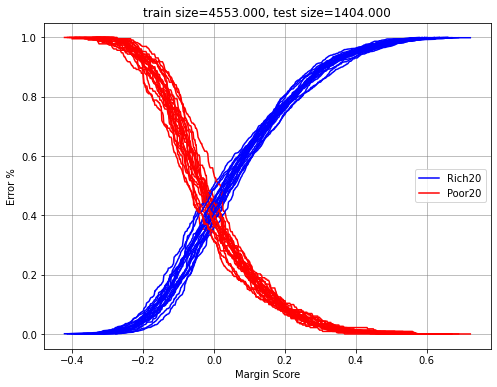

In [10]:
train_selector=array(df['country']<10)
test_selector=array(df['country']>=10)
X_train,y_train,X_test,y_test = TrainAndTest(train_selector,test_selector)

ens_size=20
error_D=plot_margins(X_train,y_train,X_test,y_test,param,ensemble_size=ens_size,\
                    TrainingRounds=[20])

data shape=(417, 513)
train_size=208 validation_size=1, test_size=208
data shape=(359, 513)
train_size=179 validation_size=1, test_size=179


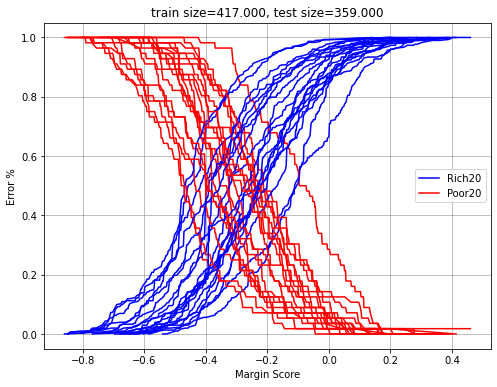

In [11]:
train_selector=array(df['country']==2)
test_selector=array(df['country']==10)
X_train,y_train,X_test,y_test = TrainAndTest(train_selector,test_selector)

ens_size=20
error_D=plot_margins(X_train,y_train,X_test,y_test,param,ensemble_size=ens_size,\
                    TrainingRounds=[20])

data shape=(3015, 513)
train_size=1507 validation_size=2, test_size=1506
data shape=(2942, 513)
train_size=1471 validation_size=2, test_size=1469


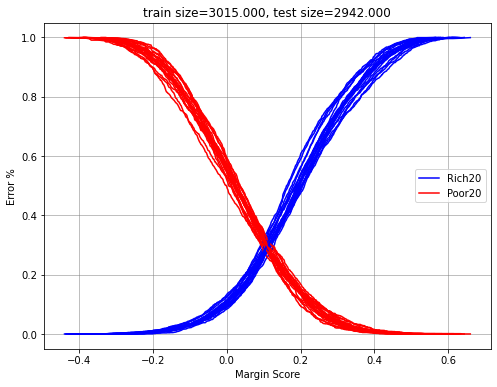

In [12]:
train_selector=np.random.rand(df.shape[0]) > 0.5
test_selector=~train_selector
X_train,y_train,X_test,y_test = TrainAndTest(train_selector,test_selector)

ens_size=20
error_D=plot_margins(X_train,y_train,X_test,y_test,param,ensemble_size=ens_size,\
                    TrainingRounds=[20])

data shape=(4553, 513)
train_size=2276 validation_size=3, test_size=2274
data shape=(1404, 513)
train_size=702 validation_size=1, test_size=701


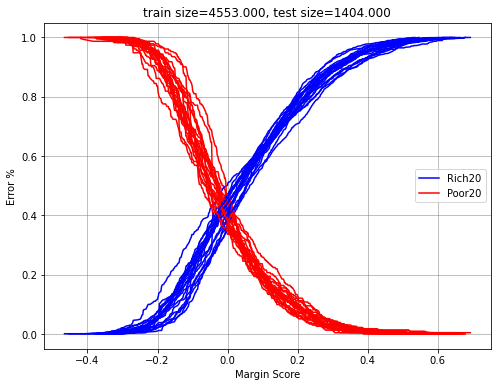

In [13]:
train_selector=array(df['country']<10)
test_selector=array(df['country']>=10)
X_train,y_train,X_test,y_test = TrainAndTest(train_selector,test_selector)

ens_size=20
error_D=plot_margins(X_train,y_train,X_test,y_test,param,ensemble_size=ens_size,\
                    TrainingRounds=[20])